What if instead of trying faces etc etc we just 

found the center of the screen 

found the nearst number (contur)

found the nearst number to that number (conuturs again)

checked if they lined up if they did its a two diget number <br/>
---- lined up here means somthing need to be done by taking both conturs rotating each of them so that they have the thinist bounding box (that one of the dimensions is minimesed) if they both are rotated roughly the same amount to do this then they line up if it dosent work then it dosent

if they dont its a one digit number nad the one closest to the screen is the number

lazy but if it works thats a techincal working program

# step 0 take in the image
not going to be nessary in when this is moved over to main program

In [1]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import copy
debug = 1 #set to 1 to see each step set to 0 to run fast
cursed = 0

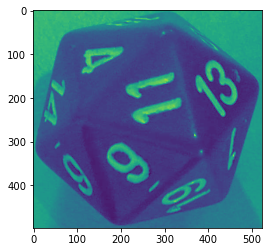

In [2]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
dieRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
dieRaw = cv2.cvtColor(dieRaw,cv2.COLOR_RGB2BGR)
dieGray = cv2.cvtColor(dieRaw,cv2.COLOR_BGR2GRAY)
if debug == 1:
    plt.imshow(dieGray)

# step 1 find the center of the screen

In [18]:
def displayCenterOfImage(image):#purely for debuing help
    h, w = image.shape
    midY, midX = h/2, w/2
    imageCopy = copy.deepcopy(image)
    imageCopy = cv2.cvtColor(imageCopy,cv2.COLOR_GRAY2BGR)
    cv2.circle(img = imageCopy,center = (int(midY), int(midX)),radius =5, color = (0,0,255), thickness = -1)
    plt.imshow(imageCopy)
    
def distBettweenPoints(x1,y1,x2,y2):
    distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    return distance

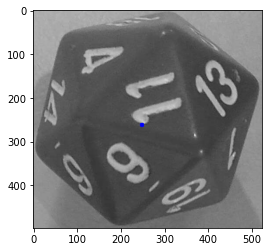

In [4]:
h, w = dieGray.shape
midY, midX = h/2, w/2
displayCenterOfImage(dieGray)

# step 2 find the two nearest conturs to the center

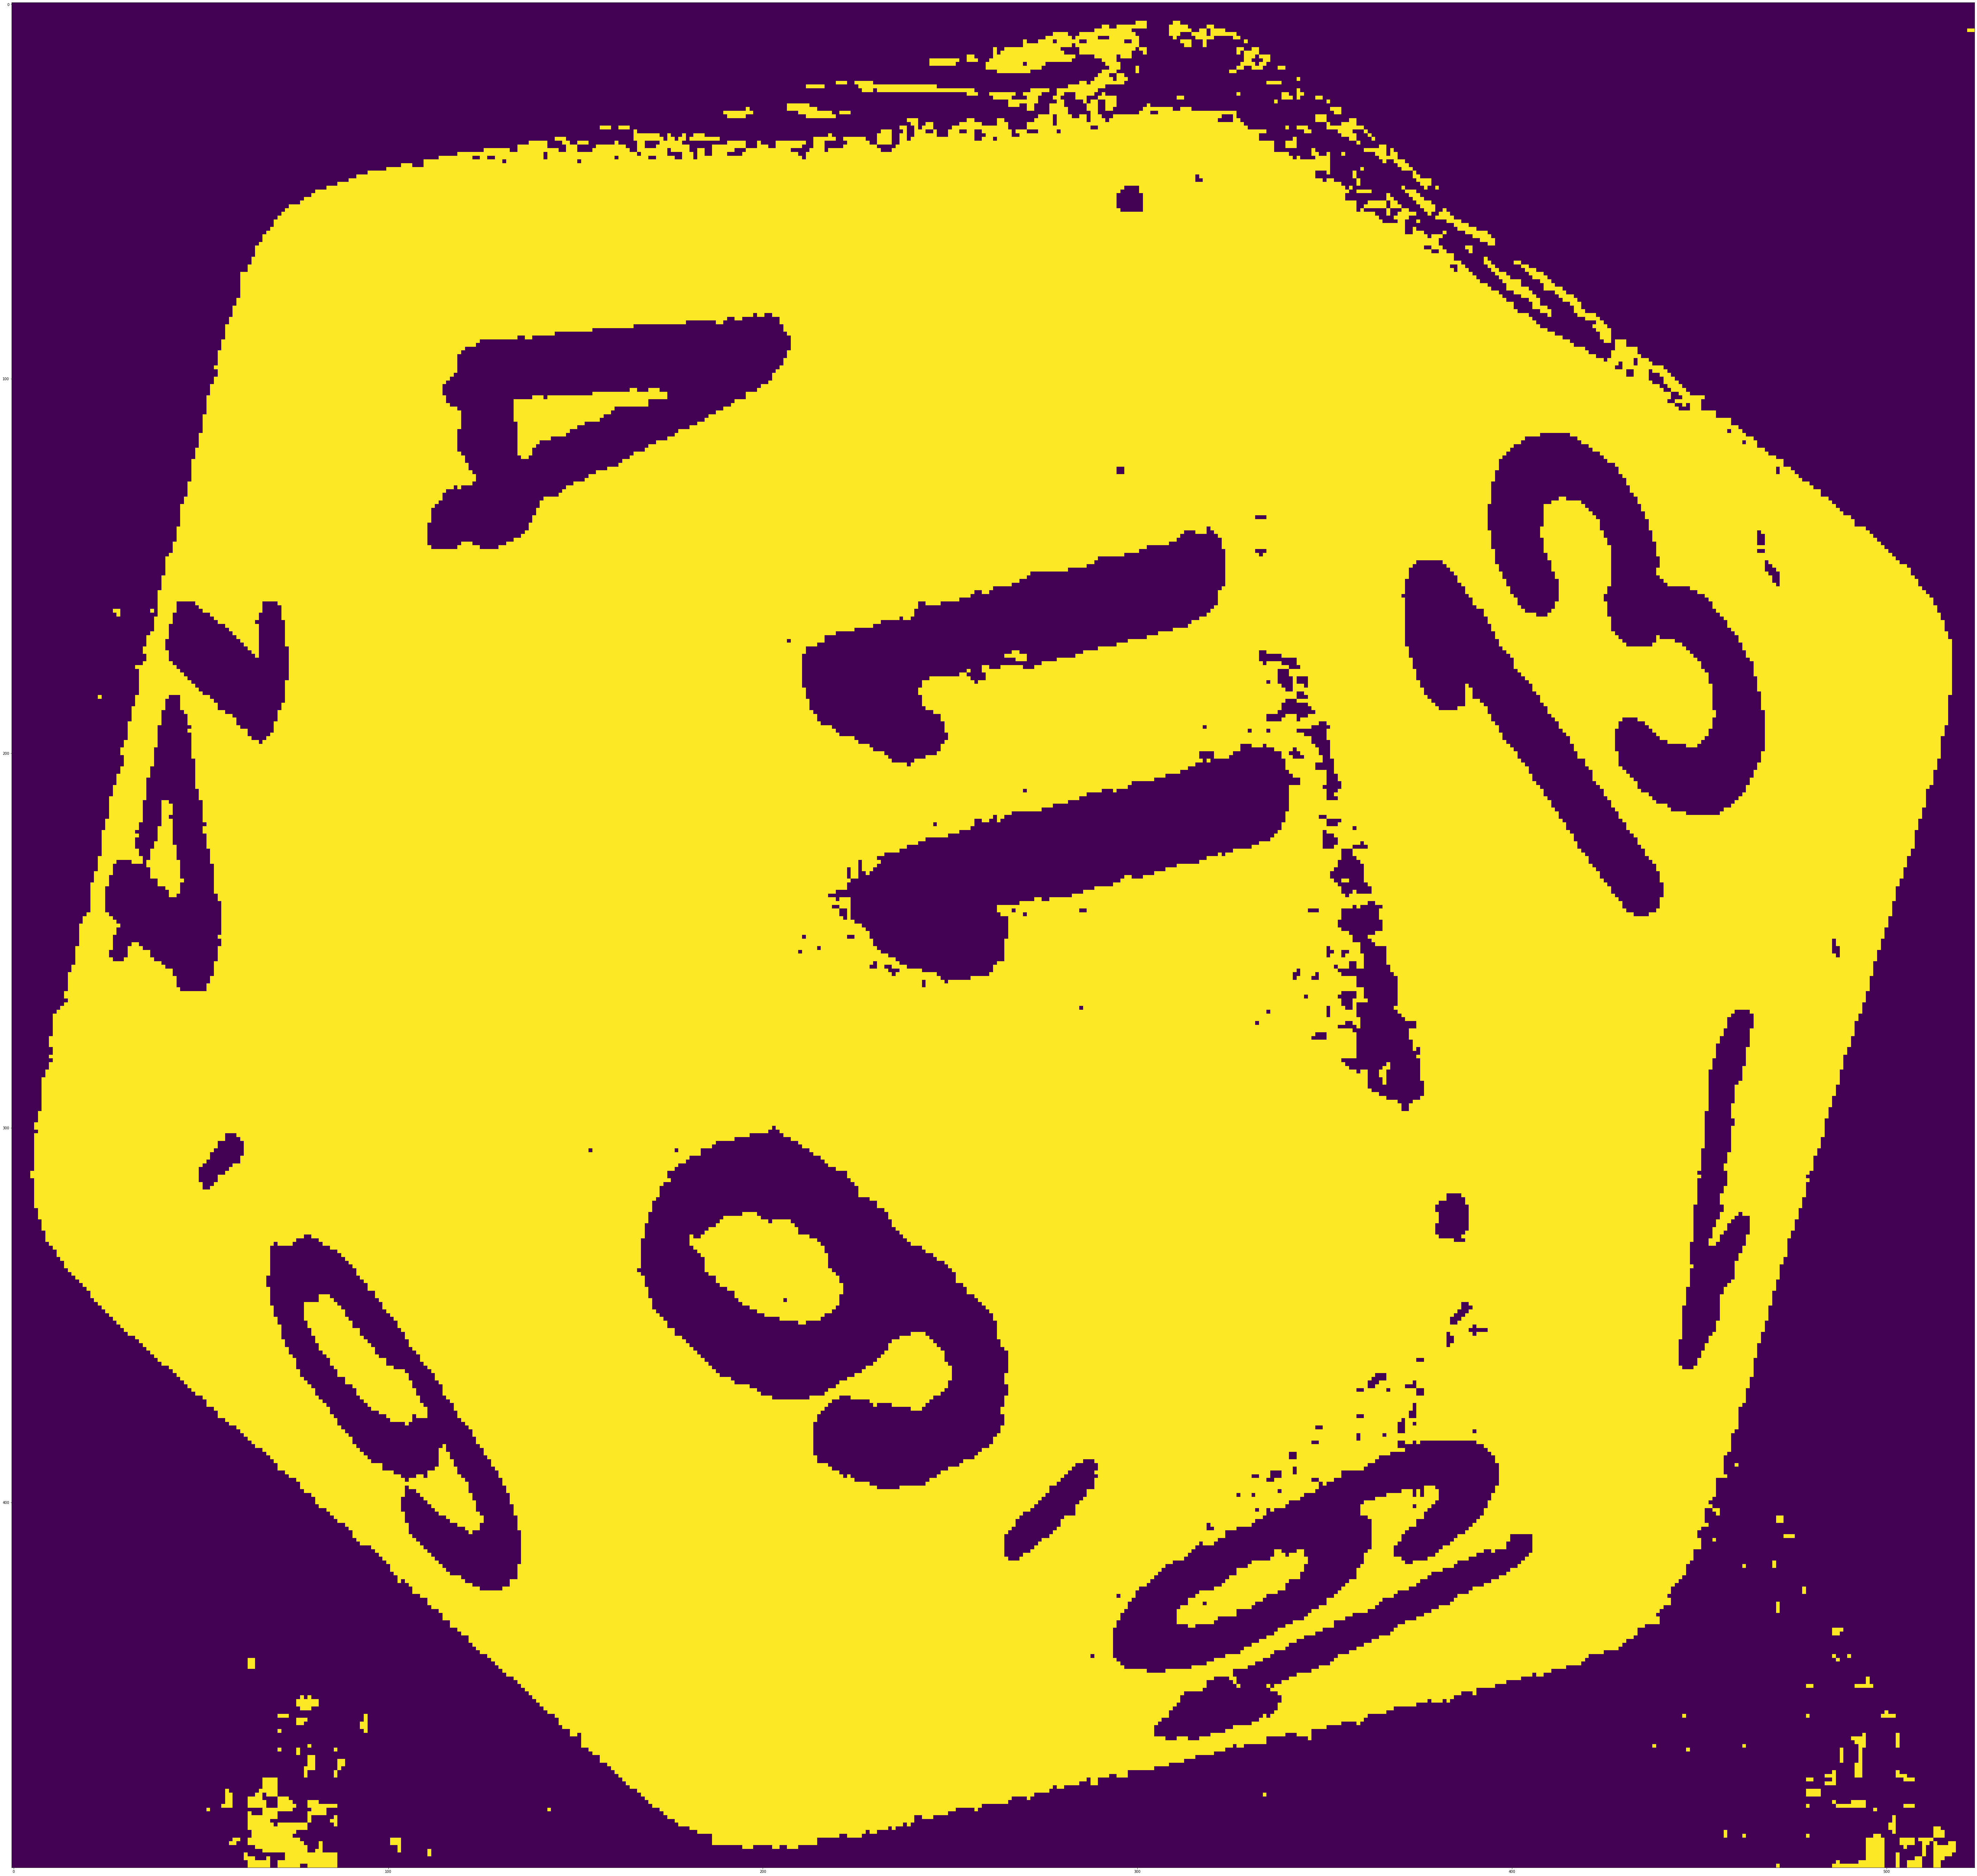

In [5]:
#MAGIC threshoulding stuff
thresholdConsant = (np.mean(dieGray) + np.std(dieGray))/25
threshholdedDieGray = cv2.adaptiveThreshold(dieGray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(threshholdedDieGray)

 clean up

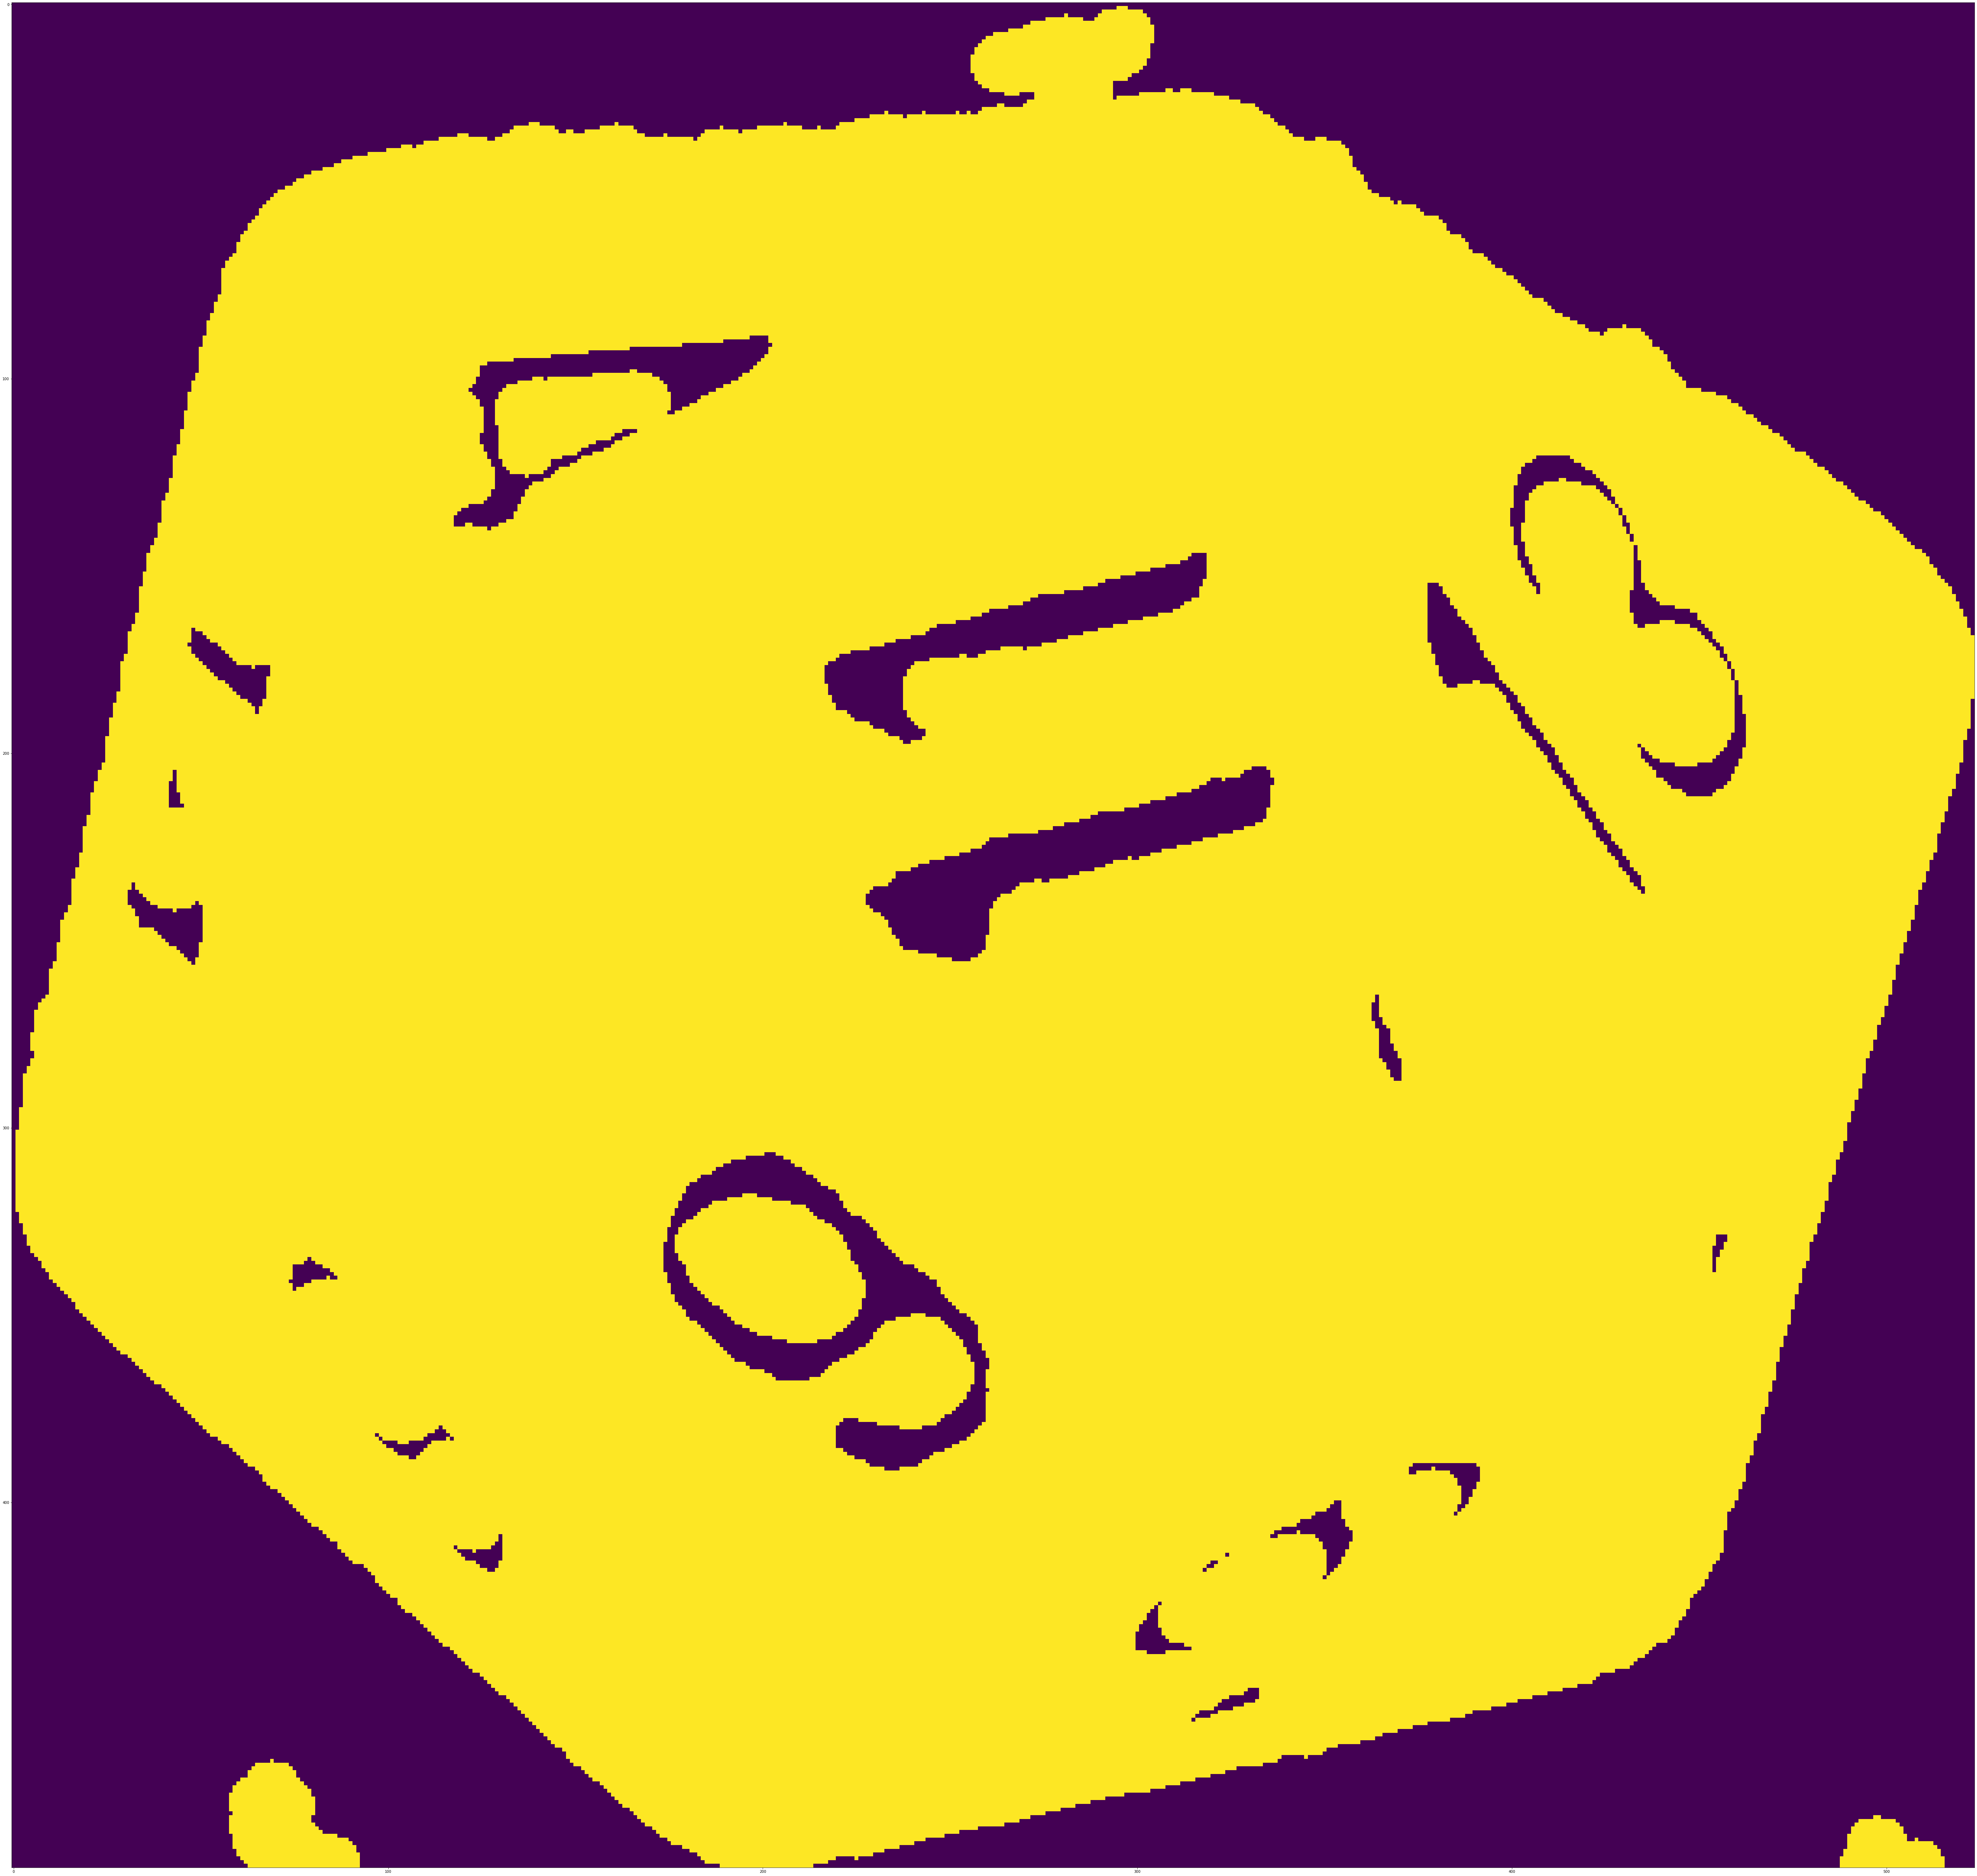

In [6]:
#MAGIC - how do we know what size the tiding up stuff should be?
circle4x4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
circle10x10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
circle3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
circle15x15 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))

diceMask = cv2.erode(threshholdedDieGray,circle4x4)
diceMask = cv2.dilate(diceMask,circle15x15)

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

# step 3 are they lined up?

https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

In [54]:
contours, hierarchy = cv2.findContours(diceMask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
if debug == 1:
    #print(contours)
    print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2  4 -1]
  [ 5 -1 -1  3]
  [ 6  4 -1  3]
  [ 7  5 -1  3]
  [ 8  6 -1  3]
  [ 9  7 -1  3]
  [10  8 -1  3]
  [11  9 -1  3]
  [12 10 -1  3]
  [13 11 -1  3]
  [14 12 -1  3]
  [15 13 -1  3]
  [16 14 -1  3]
  [17 15 -1  3]
  [18 16 -1  3]
  [19 17 -1  3]
  [20 18 -1  3]
  [21 19 -1  3]
  [22 20 -1  3]
  [23 21 -1  3]
  [24 22 -1  3]
  [25 23 -1  3]
  [26 24 -1  3]
  [27 25 -1  3]
  [28 26 -1  3]
  [29 27 -1  3]
  [30 28 -1  3]
  [31 29 -1  3]
  [32 30 -1  3]
  [33 31 -1  3]
  [34 32 -1  3]
  [35 33 -1  3]
  [36 34 -1  3]
  [37 35 -1  3]
  [38 36 -1  3]
  [39 37 -1  3]
  [40 38 -1  3]
  [41 39 -1  3]
  [-1 40 -1  3]]]


get rid of the largest contur - thated be the dice itself

In [13]:
contursWithoutLargest = []
#hierarchyWithoutLargest = []
largestContour = 0
for i in range(len(hierarchy[0])):
    if debug == 1:
        print(cv2.boundingRect(contours[i]))
    if (cv2.contourArea(contours[i]) > (cv2.contourArea(contours[largestContour]))):
        contursWithoutLargest.extend([contours[largestContour]])
        largestContour = i
    else:
        contursWithoutLargest.extend([contours[i]])
if debug == 1:
    print("contursWithoutLargest is:")
    print(contursWithoutLargest)
    

(488, 484, 28, 14)
(58, 469, 35, 29)
(314, 457, 3, 3)
(315, 449, 19, 10)
(299, 427, 17, 15)
(305, 426, 3, 3)
(349, 419, 3, 3)
(317, 417, 3, 3)
(318, 415, 5, 4)
(323, 413, 3, 3)
(117, 411, 3, 3)
(118, 408, 14, 12)
(384, 402, 3, 3)
(335, 399, 24, 22)
(372, 389, 21, 15)
(116, 382, 3, 3)
(97, 382, 3, 3)
(96, 381, 3, 3)
(98, 379, 20, 11)
(73, 334, 15, 11)
(453, 328, 6, 12)
(177, 318, 51, 40)
(173, 306, 89, 87)
(362, 264, 10, 25)
(30, 234, 22, 24)
(41, 204, 6, 12)
(227, 203, 111, 54)
(433, 197, 3, 3)
(434, 180, 30, 33)
(458, 177, 3, 5)
(457, 175, 3, 4)
(46, 166, 24, 25)
(377, 154, 60, 85)
(216, 146, 104, 53)
(431, 144, 28, 33)
(431, 141, 3, 4)
(429, 136, 4, 7)
(428, 134, 3, 4)
(427, 133, 3, 3)
(399, 120, 30, 39)
(117, 88, 87, 54)
(1, 1, 523, 497)
contursWithoutLargest is:
[array([[[497, 484]],

       [[496, 485]],

       [[493, 485]],

       [[491, 487]],

       [[491, 488]],

       [[490, 489]],

       [[490, 492]],

       [[489, 493]],

       [[489, 494]],

       [[488, 495]],

  

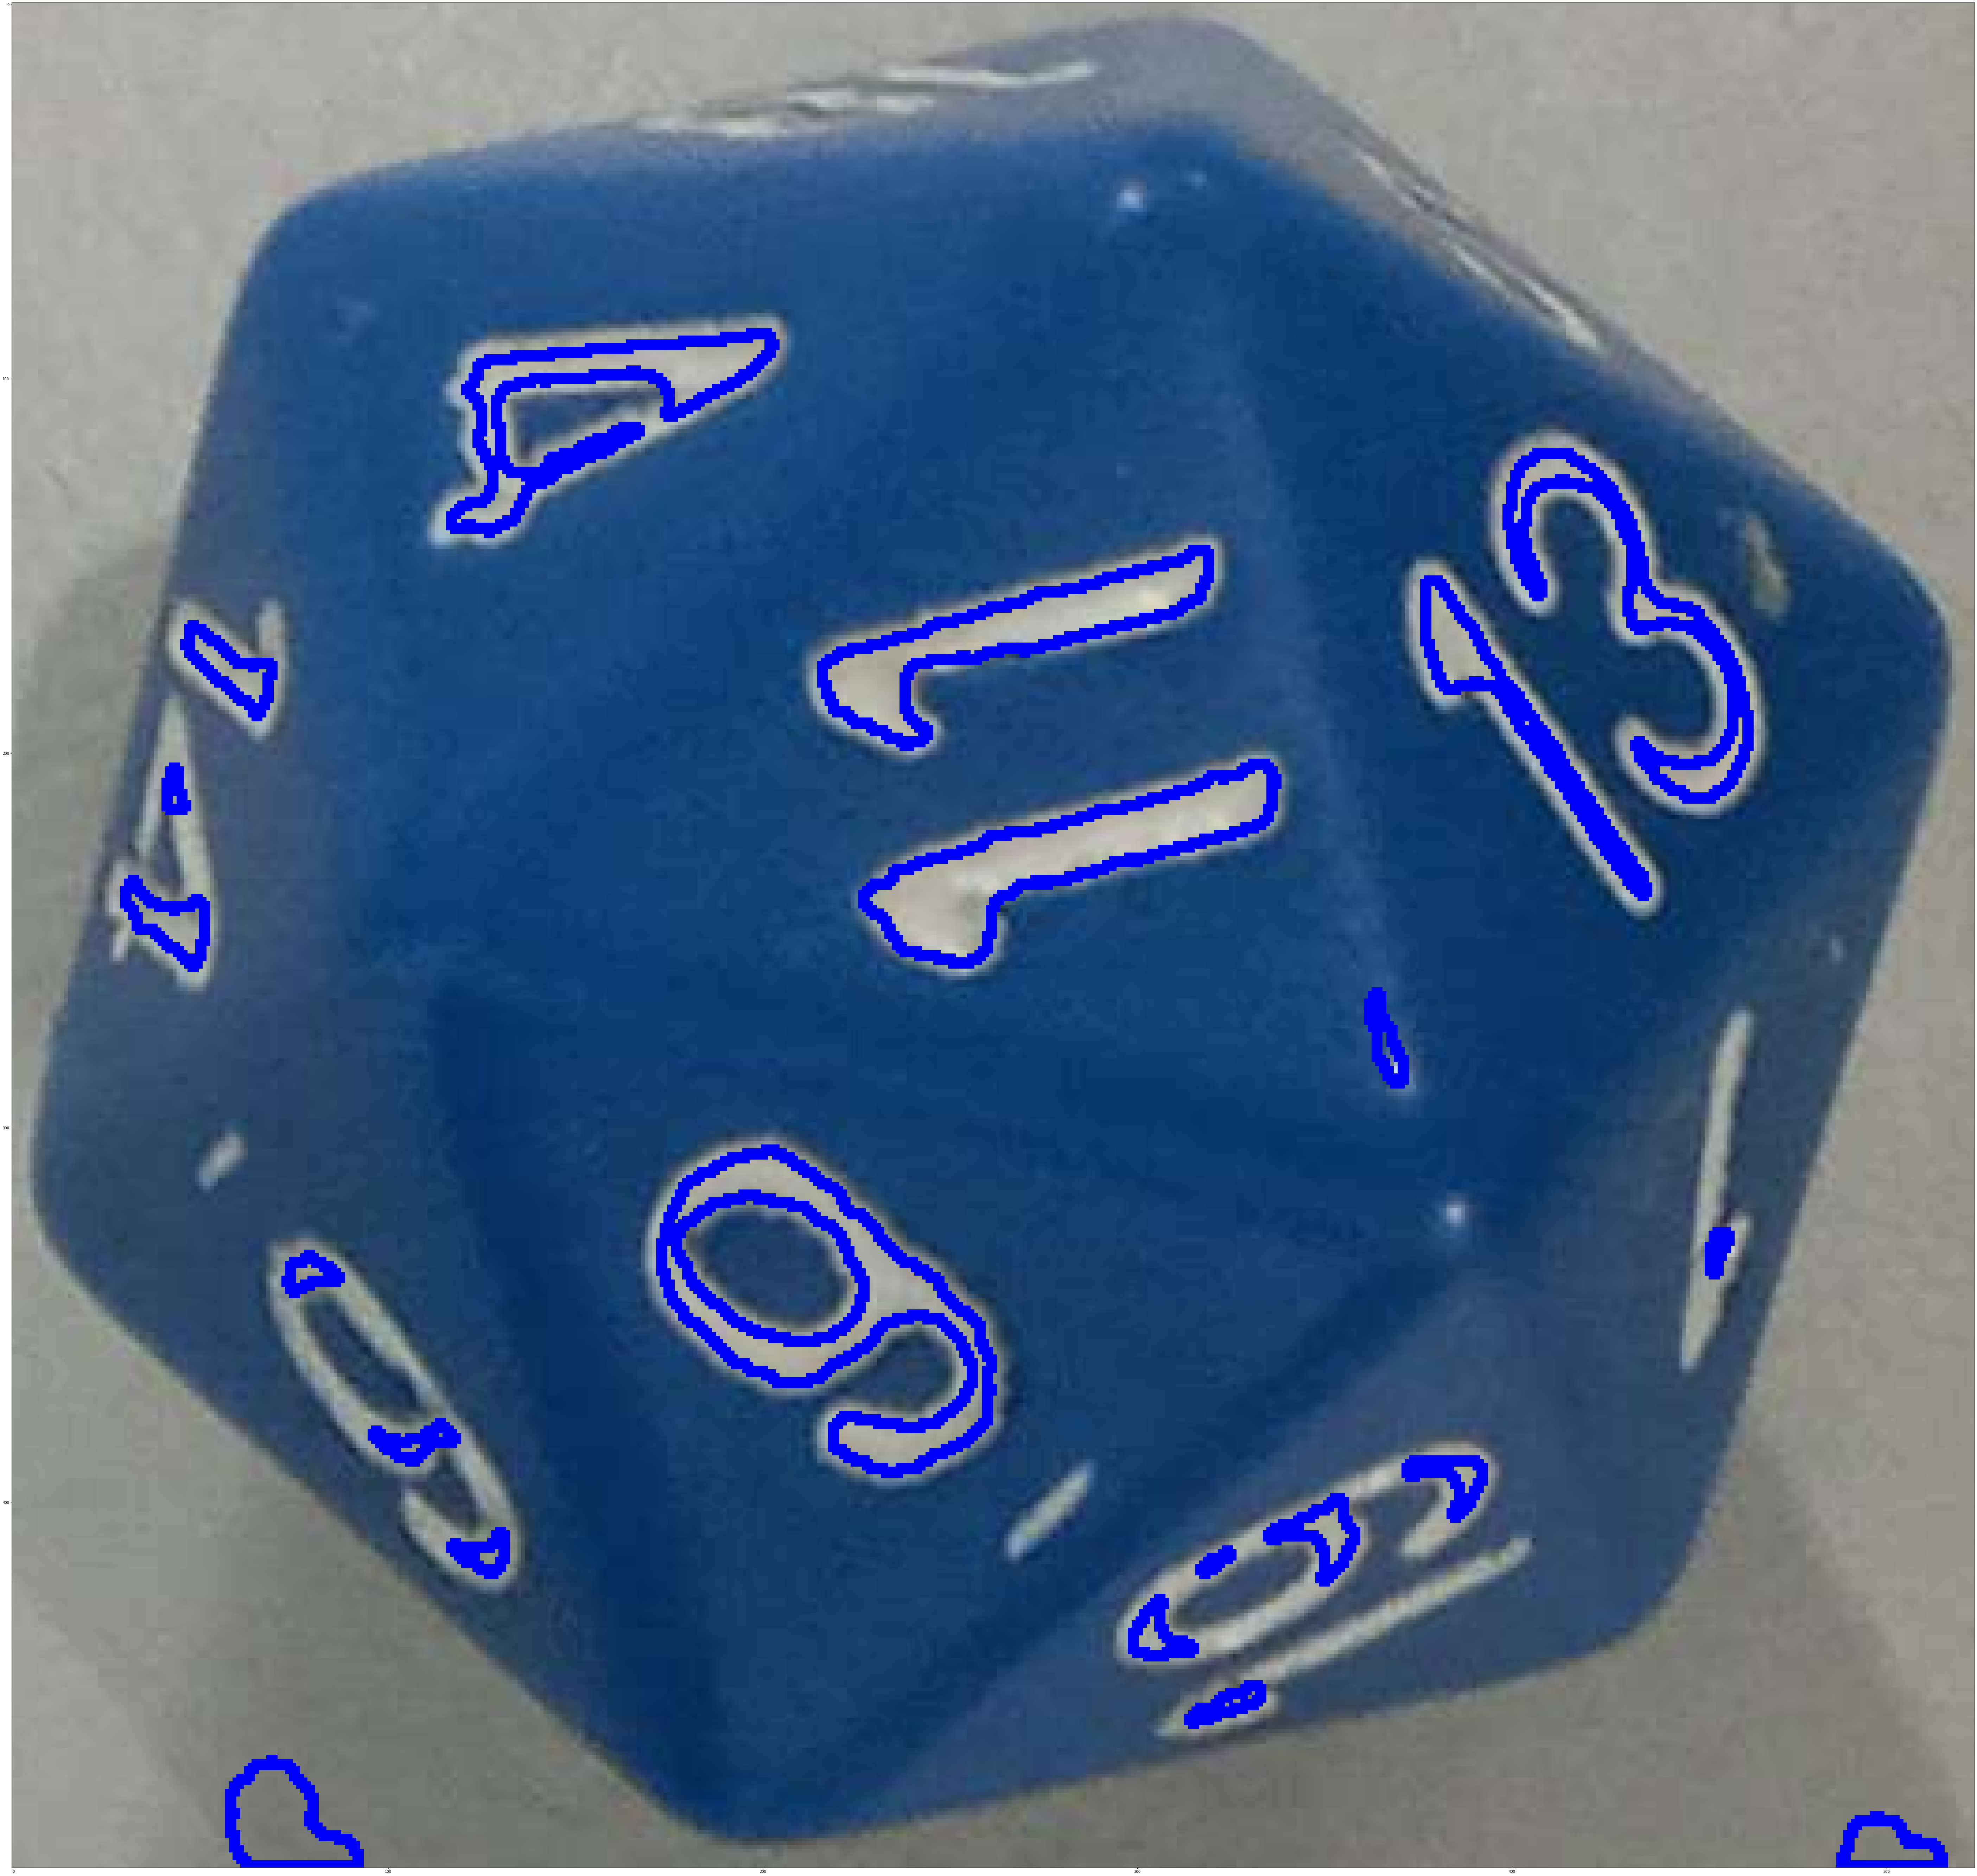

In [46]:
if debug == 1:
    dieRawTemp = copy.deepcopy(dieRaw)
    for i in range(len(hierarchy[0])):
        cv2.drawContours(dieRawTemp,contursWithoutLargest,i,(0,0,255),2)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [29]:
h, w = diceMask.shape
midY, midX = h/2, w/2
closestContur = 0
distance = h+w #always way bigger than anyother possible distance
for contur in contursWithoutLargest:
    for cords in contur:
        print("cords:")
        print(cords)
        x,y = cords[0]
        if distBettweenPoints(x,y,midX,midY) < distance:
            closestContur = contur
            distance = distBettweenPoints(x,y,midX,midY)
            if debug == 1:
                print("distance is now:")
                print(distance)

cords:
[[497 484]]
distance is now:
332.34018715767735
cords:
[[496 485]]
cords:
[[493 485]]
distance is now:
330.2377931127811
cords:
[[491 487]]
cords:
[[491 488]]
cords:
[[490 489]]
cords:
[[490 492]]
cords:
[[489 493]]
cords:
[[489 494]]
cords:
[[488 495]]
cords:
[[488 497]]
cords:
[[515 497]]
cords:
[[515 495]]
cords:
[[514 494]]
cords:
[[514 493]]
cords:
[[512 491]]
cords:
[[509 491]]
cords:
[[508 490]]
cords:
[[507 491]]
cords:
[[506 491]]
cords:
[[505 490]]
cords:
[[505 489]]
cords:
[[504 488]]
cords:
[[504 487]]
cords:
[[502 485]]
cords:
[[499 485]]
cords:
[[498 484]]
cords:
[[497 484]]
cords:
[[496 485]]
cords:
[[493 485]]
cords:
[[491 487]]
cords:
[[491 488]]
cords:
[[490 489]]
cords:
[[490 492]]
cords:
[[489 493]]
cords:
[[489 494]]
cords:
[[488 495]]
cords:
[[488 497]]
cords:
[[515 497]]
cords:
[[515 495]]
cords:
[[514 494]]
cords:
[[514 493]]
cords:
[[512 491]]
cords:
[[509 491]]
cords:
[[508 490]]
cords:
[[507 491]]
cords:
[[506 491]]
cords:
[[505 490]]
cords:
[[505 489]

cords:
[[128 129]]
cords:
[[128 124]]
cords:
[[127 123]]
cords:
[[127 122]]
cords:
[[126 121]]
cords:
[[126 120]]
cords:
[[125 119]]
cords:
[[125 118]]
cords:
[[124 117]]
cords:
[[124 115]]
cords:
[[125 114]]
cords:
[[125 108]]
cords:
[[124 107]]
cords:
[[124 106]]
cords:
[[121 103]]
cords:
[[123 101]]
cords:
[[123 100]]
cords:
[[124  99]]
cords:
[[124  97]]
cords:
[[125  96]]
cords:
[[126  96]]
cords:
[[127  95]]
cords:
[[133  95]]
cords:
[[134  94]]
cords:
[[143  94]]
cords:
[[144  93]]
cords:
[[153  93]]
cords:
[[154  92]]
cords:
[[164  92]]
cords:
[[165  91]]
cords:
[[178  91]]
cords:
[[179  90]]
cords:
[[189  90]]
cords:
[[190  89]]
cords:
[[200 307]]
cords:
[[201 306]]
cords:
[[203 306]]
cords:
[[204 307]]
cords:
[[205 307]]
cords:
[[206 308]]
cords:
[[207 308]]
cords:
[[209 310]]
cords:
[[210 310]]
cords:
[[212 312]]
cords:
[[213 312]]
cords:
[[216 315]]
cords:
[[217 315]]
cords:
[[218 316]]
cords:
[[219 316]]
cords:
[[221 318]]
cords:
[[221 319]]
cords:
[[222 320]]
cords:
[[222

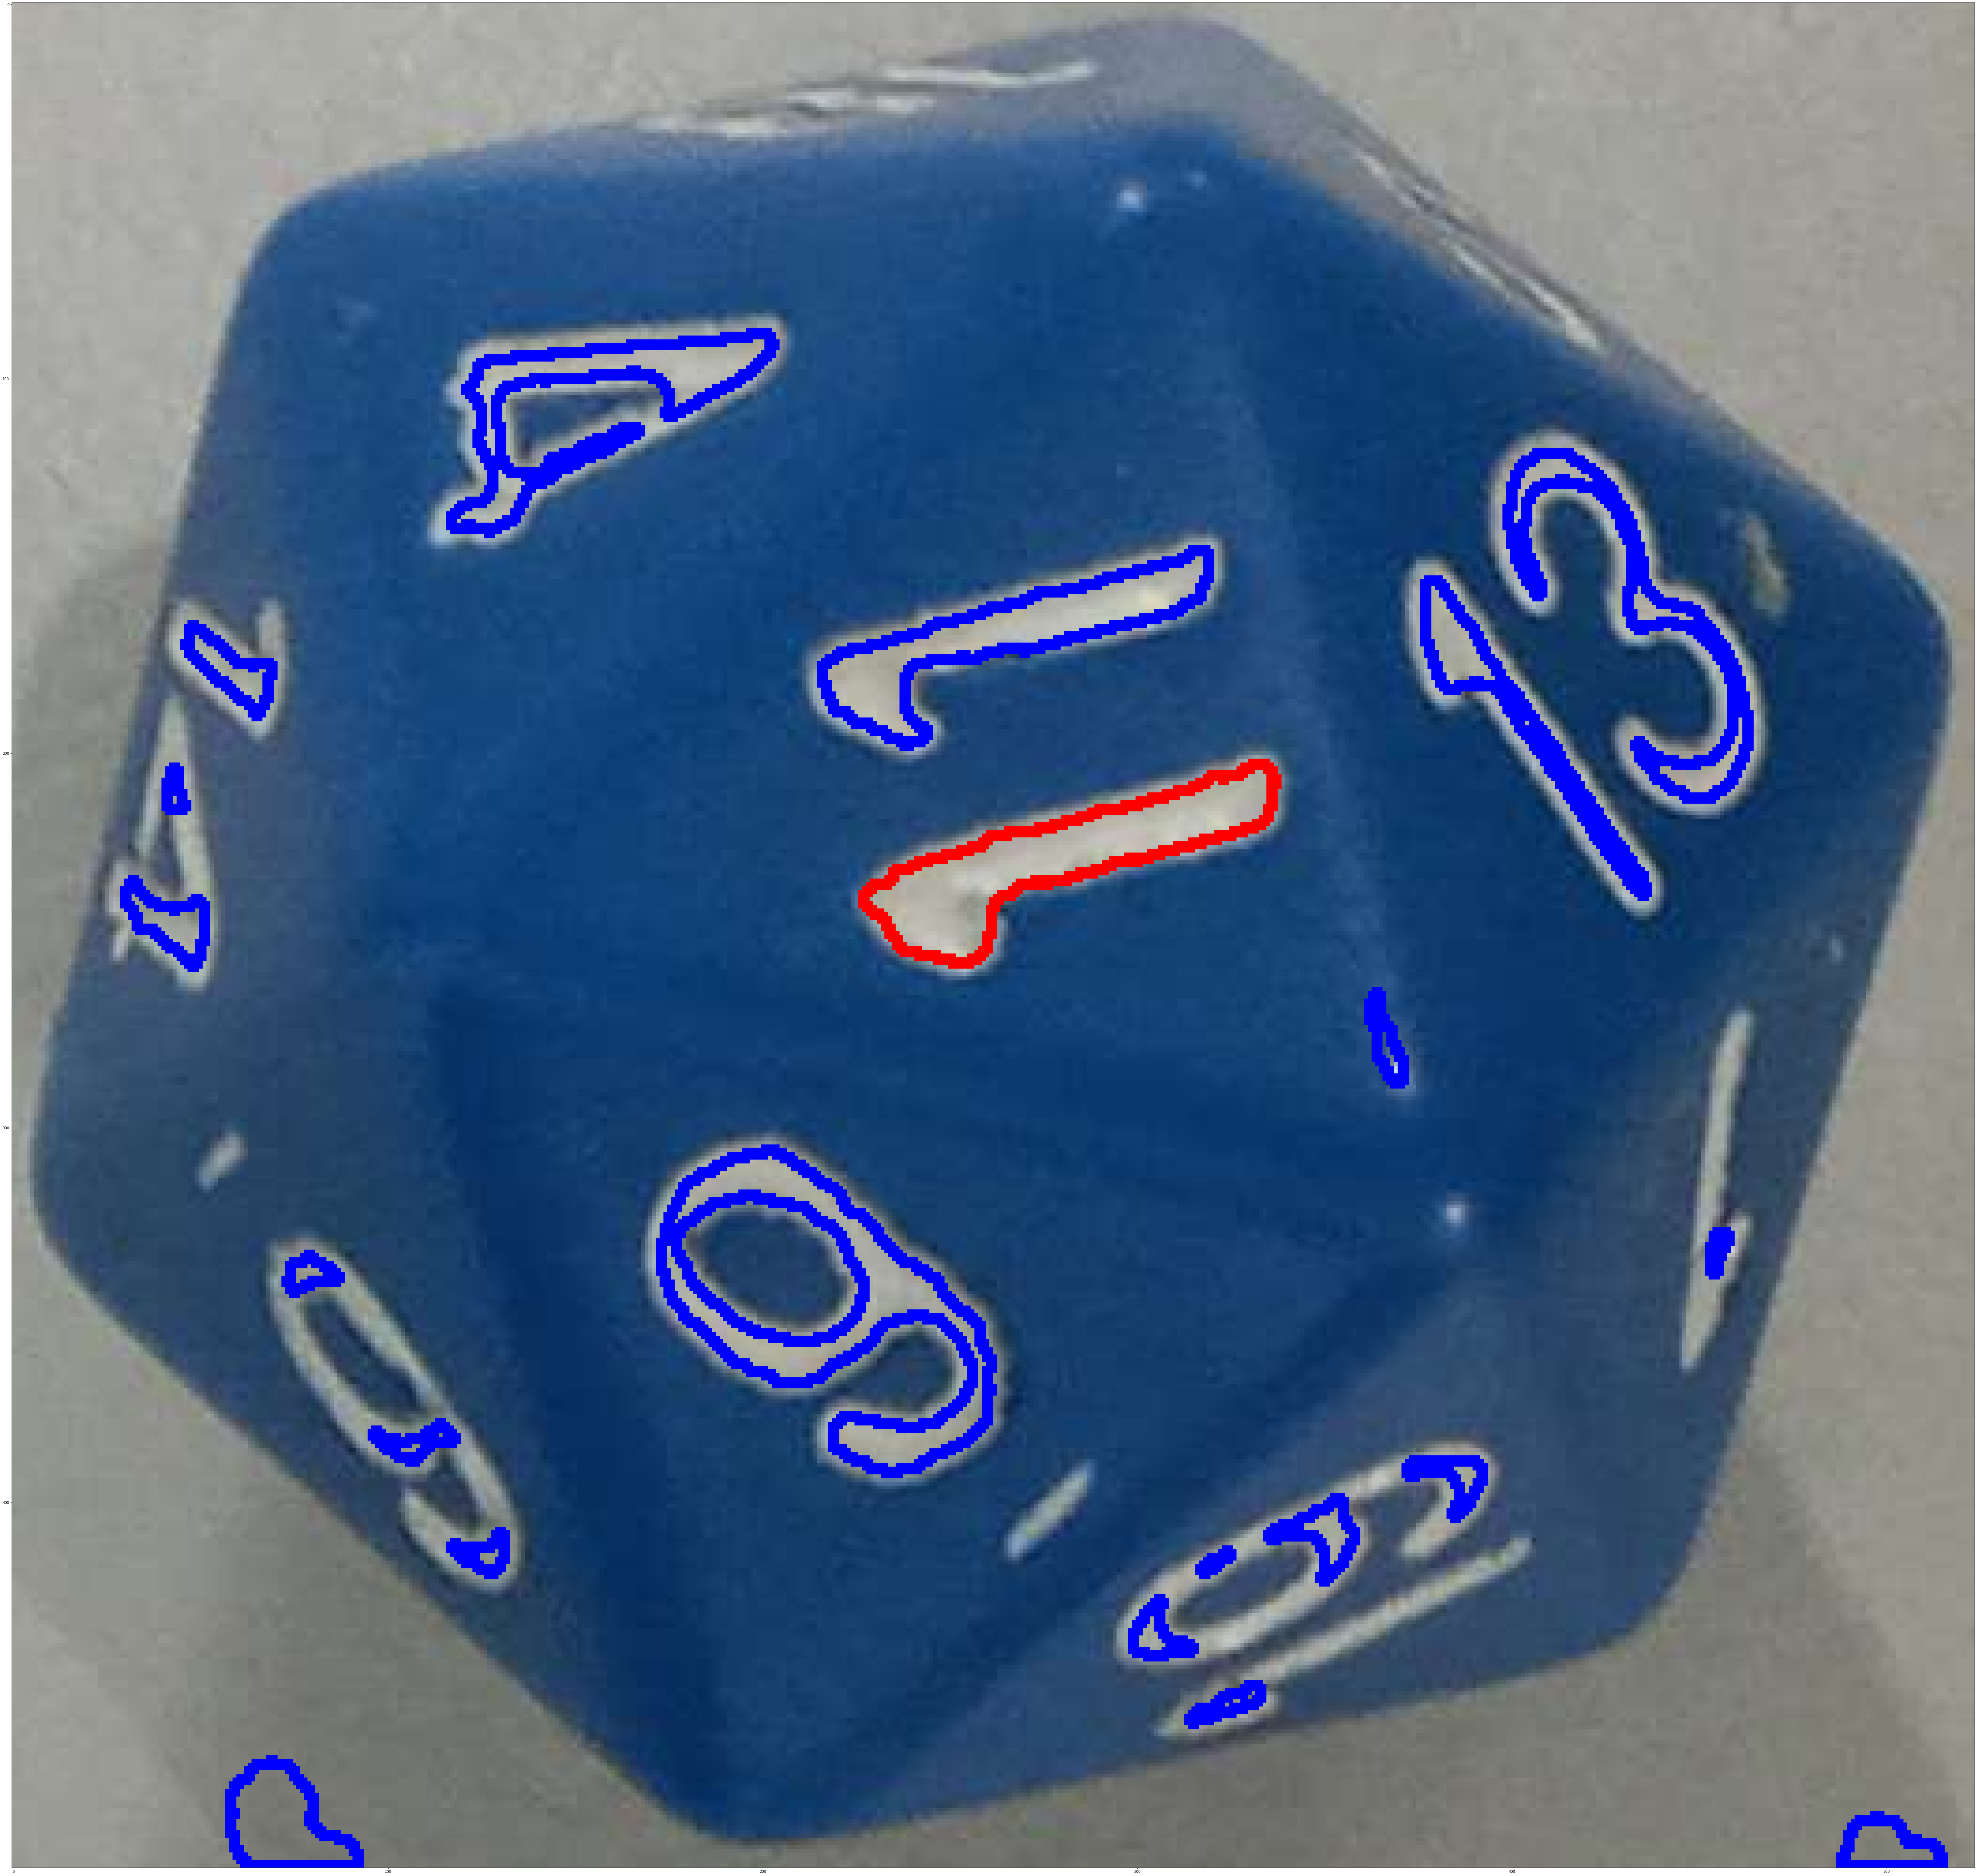

In [47]:
if debug == 1:
    cv2.drawContours(dieRawTemp,[closestContur],-1,(255,0,0),2)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [73]:
centerMoment = cv2.moments(closestContur)
centerMomentMassCenter = centerMoment['m10'] / (centerMoment['m00'] + 1e-5), centerMoment['m01'] / (centerMoment['m00'] + 1e-5)
if debug == 1:
    print(centerMomentMassCenter)


#sourced from:
# Get the moments
mu = [None]*len(contursWithoutLargest)
for i in range(len(contursWithoutLargest)):
    mu[i] = cv2.moments(contursWithoutLargest[i])

    # Get the mass centers
mc = [None]*len(contursWithoutLargest)
for i in range(len(contursWithoutLargest)):
    # add 1e-5 to avoid division by zero
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
if debug == 1:
    print(mc)

(278.1846844046981, 228.75284045068548)
[(500.127471504524, 492.0206342441324), (500.127471504524, 492.0206342441324), (314.99842500787497, 457.99771001144995), (325.1057685017298, 453.62162111826115), (304.93624461409365, 435.9623755592442), (305.9984700076499, 426.99786501067496), (349.99825000874995, 419.99790001049996), (317.99841000794993, 417.9979100104499), (319.9995428577959, 416.49940500085), (323.99838000809996, 413.99793001034993), (117.99941000294999, 411.99794001029994), (126.05145205125704, 414.11513517914676), (384.9980750096249, 402.99798501007496), (349.9773172817384, 408.34936307746756), (384.58368845849554, 393.1079443091132), (116.99941500292498, 382.99808500957494), (97.99951000244998, 382.99808500957494), (96.99951500242499, 381.9980900095499), (107.67604117238857, 384.3567533769831), (79.0096503850748, 338.995119952398), (454.97762611856905, 332.6110002407777), (71.60263690679906, 485.59795846774455), (202.62550996900956, 337.443920547938), (366.38734777794434, 2

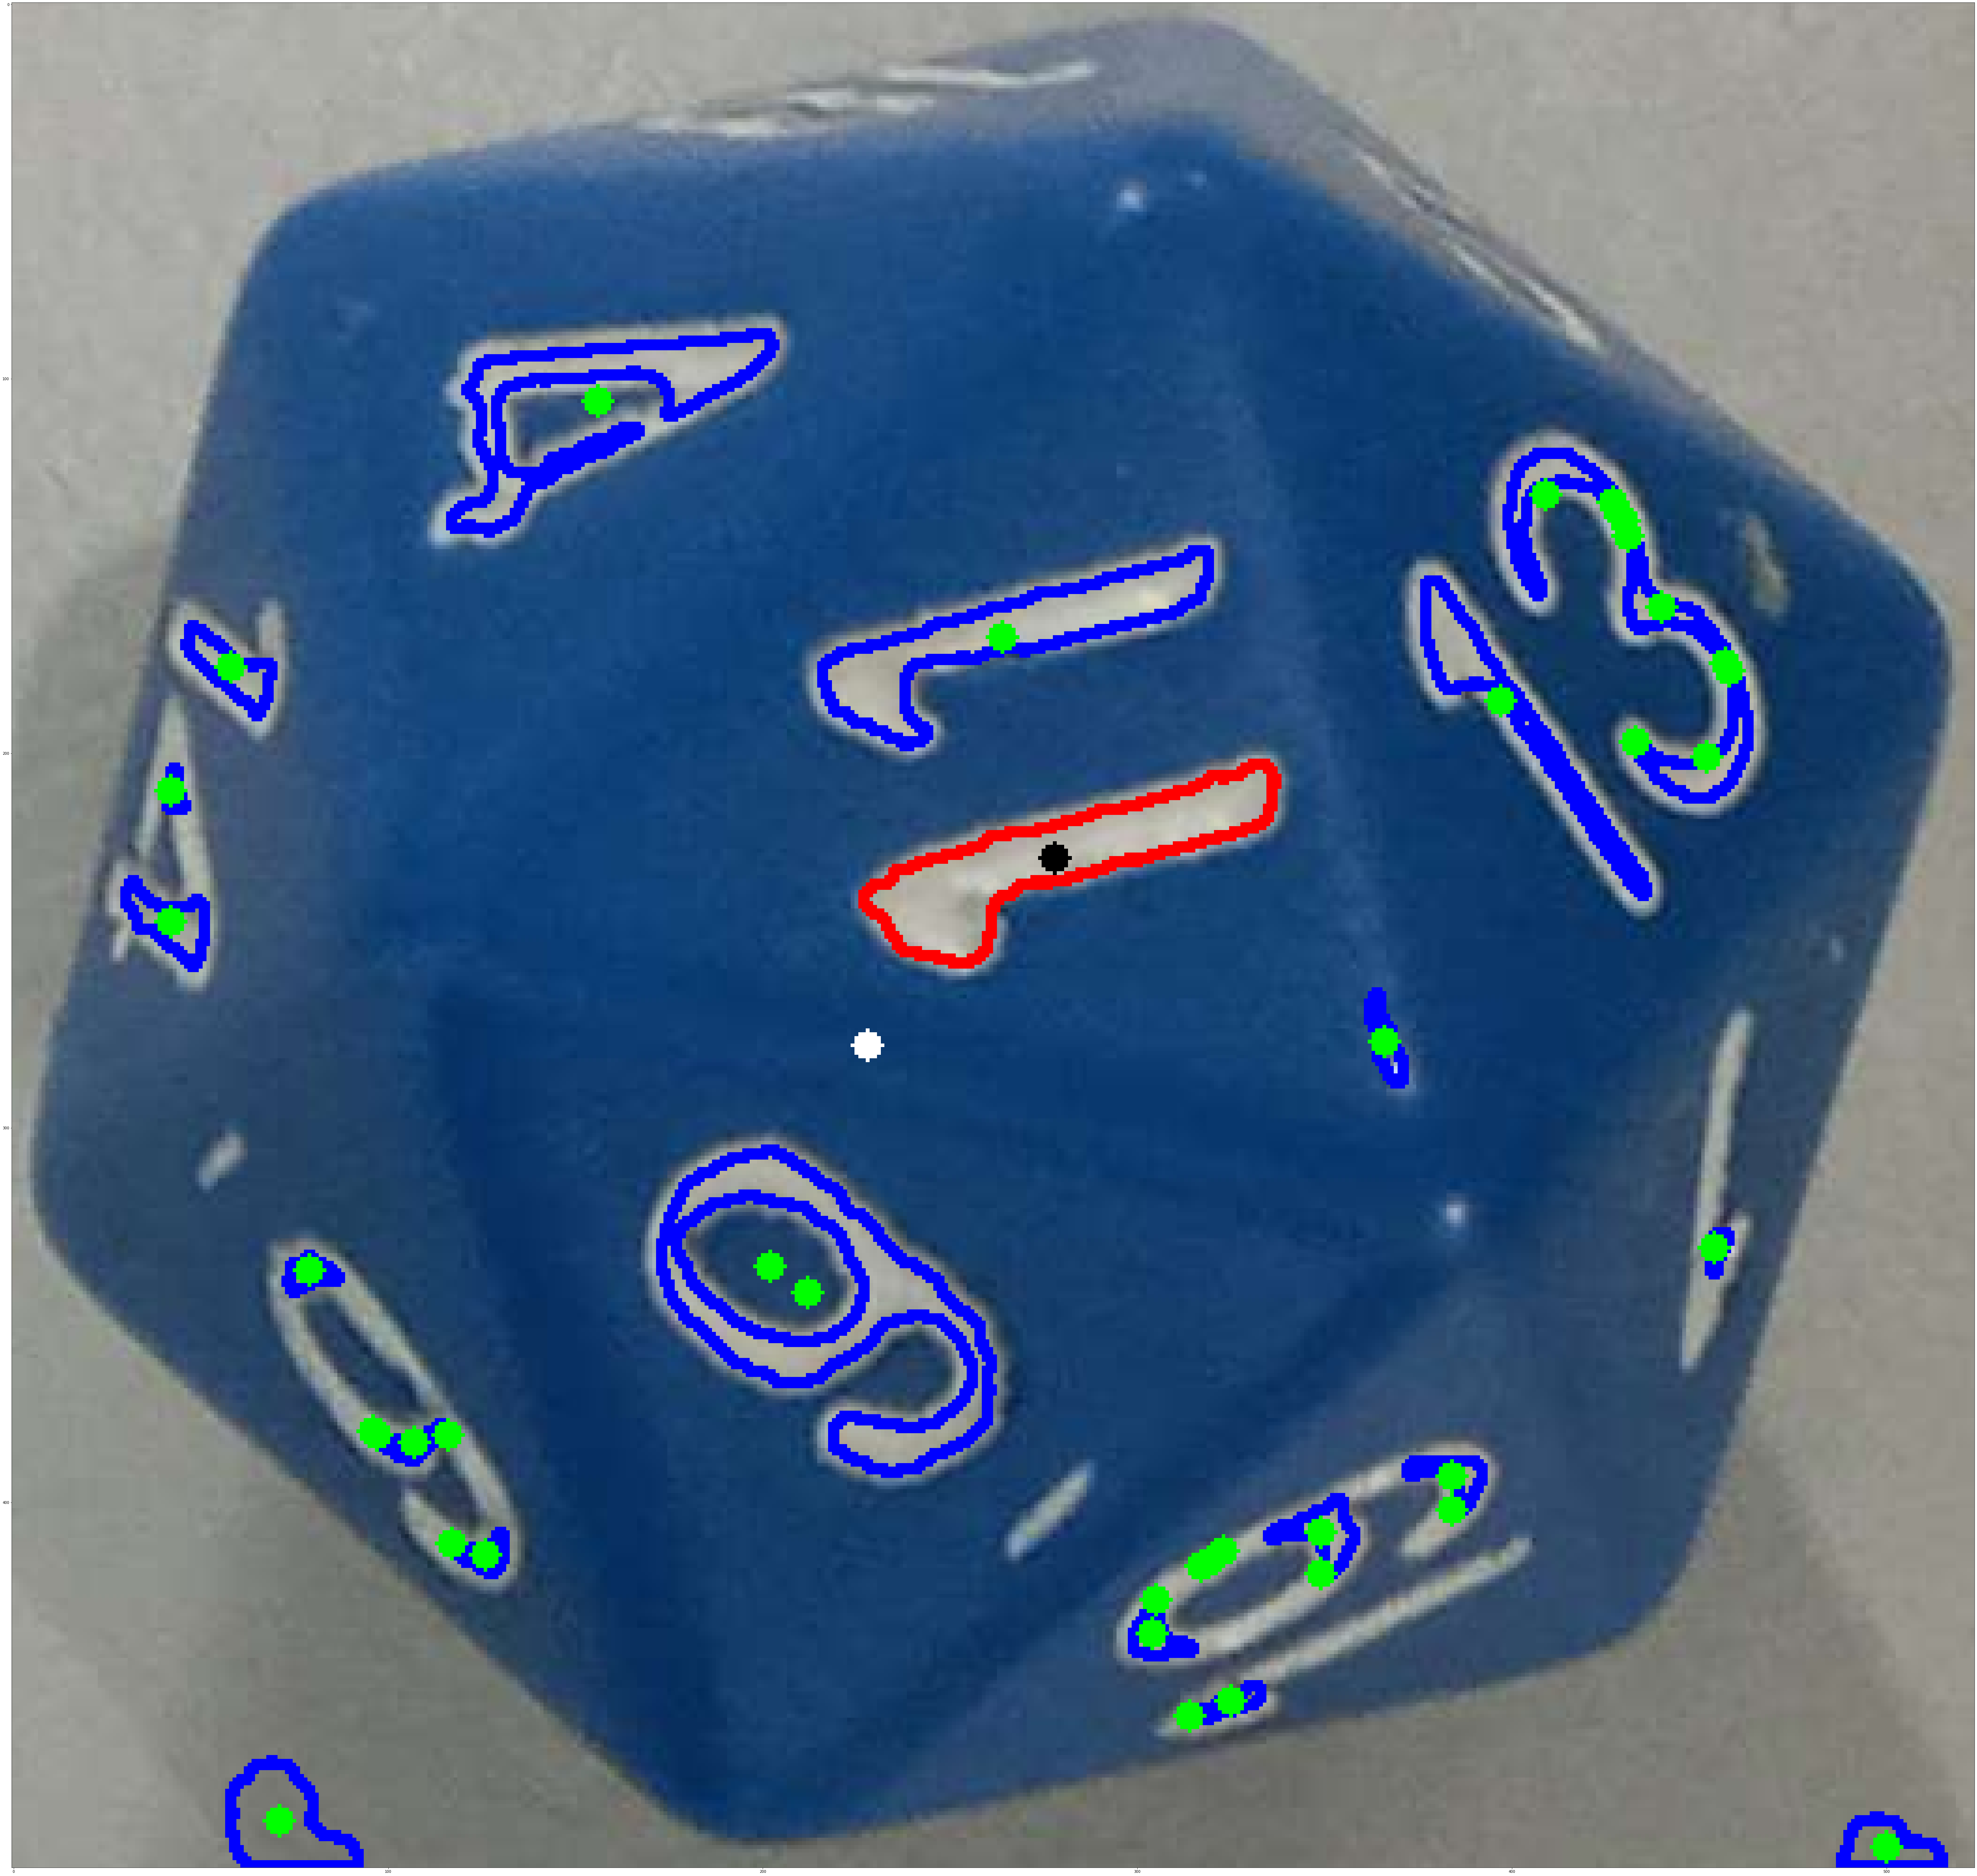

In [58]:
if debug == 1:
    for i in range(len(contursWithoutLargest)):
        cv2.circle(dieRawTemp, (int(mc[i][0]), int(mc[i][1])), 4, (0,255,0), -1)
    cv2.circle(dieRawTemp,(int(centerMomentMassCenter[0]),int(centerMomentMassCenter[1])),4,(0,0,0),-1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

illustrated above is a problem spefilcy the 9 with two dots inside of it
the following code works around this but really this problem should be fixed using hirarcys
https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html
\<refactor using this might make faster code

In [75]:
distance = h+w #always way bigger than anyother possible distance

xCord1 = centerMomentMassCenter[0]
yCord1 = centerMomentMassCenter[1]
secondClosestCord = ()
secondClosestCordIndex = 0
i = 0
for cords in mc:
    xCord2 = cords[0]
    yCord2 = cords[1]
    if distBettweenPoints(xCord1,yCord1,xCord2,yCord2) < distance and cords != centerMomentMassCenter and cv2.pointPolygonTest(contour=closestContur,pt=cords,measureDist=False)==-1:
        secondClosestCord = cords
        secondClosestCordIndex = i
        distance = distBettweenPoints(xCord1,yCord1,xCord2,yCord2)
    i += 1
    
print(secondClosestCord)
print(secondClosestCordIndex)
print(distance)

(264.2234097774626, 169.204764024829)
33
61.16282036692499


time to use this https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

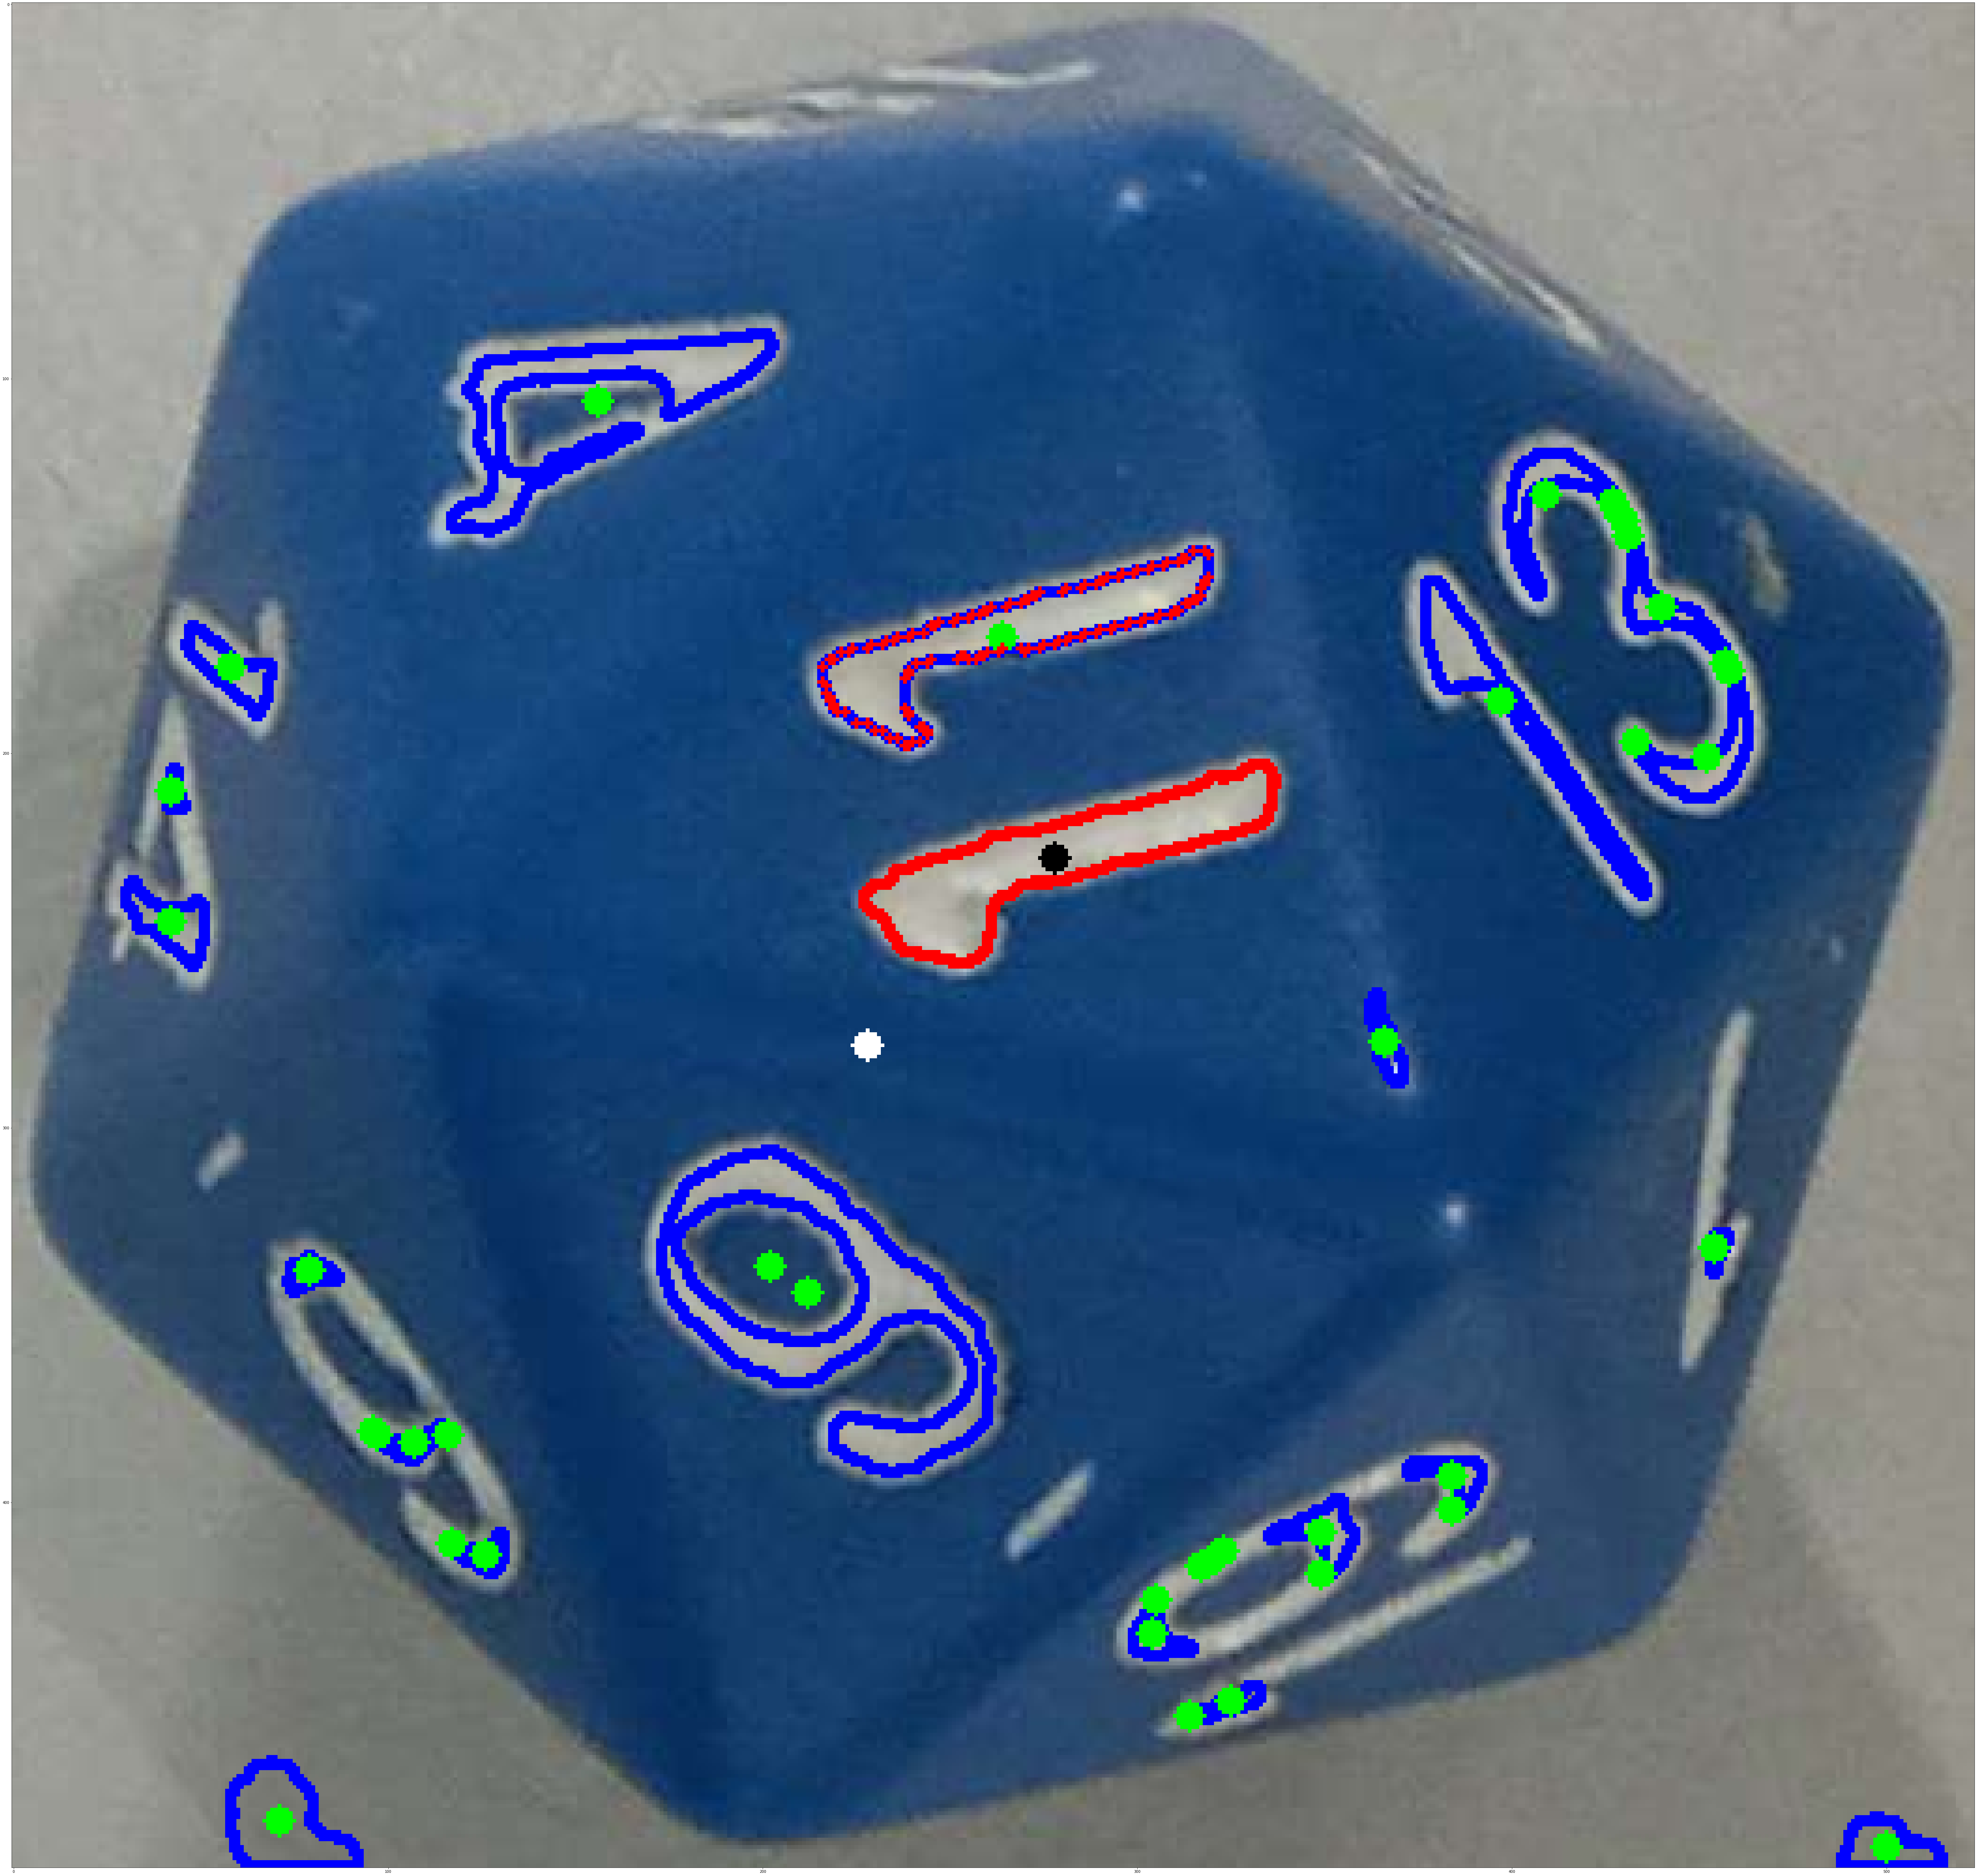

In [77]:
if debug == 1:
        cv2.drawContours(dieRawTemp,contursWithoutLargest[secondClosestCordIndex],-1,(255,0,0),2)
        plt.figure(figsize=(100,100))
        plt.imshow(dieRawTemp)